In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# Change font size to 12
plt.rcParams.update({'font.size': 12})
# Change font to Arial
plt.rcParams.update({'font.family': 'Arial'})

from ode_model import * 

In [2]:
p = default_parameters()

N_CAPS = p['Vcap']/p['kdcap']
# Initial conditions
initial_conditions = np.zeros(23)
initial_conditions[0] = N_CAPS # Number of CAPS 
initial_conditions[1] = 1 # Number of Virus

# Time points
t = np.linspace(0, 10, 1000)

# Solve ODE
sol = odeint(model, initial_conditions, t, args=(p,), rtol=1e-8)

In [3]:
sol[-1,:]

array([6.60362822e+00, 5.62395472e+02, 6.98281353e+02, 4.80369616e+01,
       5.96436345e+01, 6.80187836e+01, 8.44534253e+01, 4.62172574e+02,
       4.15304535e+01, 1.99518485e+02, 1.21071011e+04, 4.11576940e+02,
       2.46946164e+03, 5.14368395e+00, 1.27904174e+01, 5.55150414e+03,
       7.08761471e+02, 3.03664060e+02, 1.73399895e+01, 1.11217302e-04,
       6.74760466e+01, 8.23153880e+02, 1.16544694e+04])

In [4]:
temperature = np.linspace(37,39,10)

results = []

for T in temperature:
    p = default_parameters()
    p['T'] = 273.15 + T
    # Solve ODE
    sol = odeint(model, initial_conditions, t, args=(p,), rtol=1e-9)
    # Store the results
    results.append(sol[-1,:]) # Store the last value of CAPS

results = np.array(results)

In [5]:
# Species to index mapping
species = ['cap', 'Sv', 'Sc', 'Sv_Pol', 'Sc_Pol', 'Sv_Pol_Np', 'Sc_Pol_Np', 
            'MCRNA', 'MVRNA', 'MCRNA_Pol_Pol', 'MVRNA_Pol_Pol', 'mRNA_Pol', 
            'mRNA_NP', 'Pol', 'NP', 'Sv_c', 'MVRNA_Pol', 'MCRNA_Pol',
            'cappedMVRNA', 'cappedMCRNA', 'dsMVRNA', 'mRNA_NEP', 'NEP']

species = {s: i for i, s in enumerate(species)}

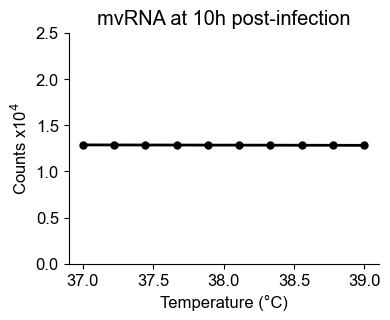

In [6]:
# PLot the mvRNA as a function of temperature effect on binding affinity
observable_minis= {'MVRNA': 1, 'MVRNA_Pol_Pol': 1, 'MVRNA_Pol': 1, }

mini_temp = sum([results[:, species[k]] for k in observable_minis.keys()])

# Plot the results
fig, ax = plt.subplots(figsize=(4,3)) 
plt.plot(temperature, mini_temp*1e-4, color='black', lw=2, marker='o', markersize=5, label='mRNA')

plt.ylim([0,2.5])
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Counts x10$^{4}$')
ax.set_title('mvRNA at 10h post-infection')
sns.despine()

plt.savefig('figures/binding_temperature_effect_on_mRNA.svg', bbox_inches='tight')

In [7]:
# Changein binding constants as function of temperature
deltaG  = np.array([p[g] for g in DG_NAMES])
binding_constant =[]
K0 = binding_constants( deltaG, 37 + 273.15)

for T in temperature:
    K = binding_constants( deltaG, T + 273.15) # convert to M
    binding_constant.append(K/K0)

binding_constant = np.array(binding_constant)

In [8]:
DG_NAMES

['dG_vRNA', 'dG_cRNA', 'dG_pol', 'dG_np', 'dG_cap']

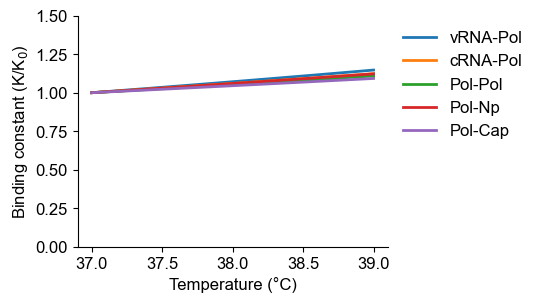

In [9]:
# Plot results
fig, ax = plt.subplots(figsize=(4,3))
plt.plot(temperature, binding_constant,lw=2)
plt.ylim([0, 1.5])
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Binding constant (K/K$_0$)')

# Legend outside the plot
ax.legend(['vRNA-Pol','cRNA-Pol','Pol-Pol','Pol-Np','Pol-Cap','mvRNA-DS'], 
          loc='upper left', bbox_to_anchor=(1, 1),frameon=False)

sns.despine()

plt.savefig('figures/binding_constants_predicted_temp.svg', bbox_inches='tight')

In [10]:
NA*V

602200000.0000001